# Homotopy Continuation

Solve $f(x)=0$ for $x$.

- $f(x)=0$ is nominally hard to solve. 
- Consider a function $g(x)=0$ that is easy to solve.
- Introduce parameter $t$ that couples $f$ and $g$:
$$h(x,t) = tf(x) + (1-t)g(x),$$
$$0\le t\le 1.$$
- When $t=0$ we have $h(x,0) = g(x)$.
- When $t=1$ we have $h(x,1) = f(x)$.

**Note, we are using $t$ as a homotopy parameter. This is not a time variable, but is analogous to it.**


## Approach 1
Solve this problem using a sequence of $t$ values, starting at $t=0$.
- $t=0$; $h(x,0)=g(x)=0\rightarrow x_{t=0}$. 
- $t=\Delta t$; $h(x,\Delta t)=0 \rightarrow x_{t=\Delta t}$. Solve this with Newton's method using $x_{t=0}$ as an initial guess. 
- $t=2\Delta t$; $h(x,2\Delta t)=0 \rightarrow x_{t=2\Delta t}$. Solve this with Newton's method using $x_{t=\Delta t}$ as an initial guess. 
- Repeat to $t=1$, where $x_{t=1}$ is the solution to $f(x)=0$.




## Approach 2
Again, we have:
$$h(x,t) = tf(x) + (1-t)g(x),$$

Take the derivative:
$$dh = \frac{\partial h}{\partial x}dx + \frac{\partial h}{\partial t}dt = 0.$$ 

Divide by $dt$ and solve for $dx/dt$:
$$\frac{dx}{dt} = -\left(\frac{\partial h}{\partial x}\right)^{-1}\left(\frac{\partial h}{\partial t}\right)_x.$$

If we consider $x$, $f(x)$ and $g(x)$ as vectors, then we have
$$\frac{dx}{dt} = -J^{-1}\left(\frac{\partial h}{\partial s}\right)_x,$$
where $J$ is the Jacobian matrix with elements $J_{i,j} = \partial h_i/\partial x_j.$

This gives
$$\frac{dx}{ds} = -J^{-1}\left(f(x)-g(x)\right).$$

We then solve the ODE (system) from $t=0$ to $t=1$ with initial condition $x_0$.

### Newton homotopy

Use the following for $g(x)$, which has solution $x_0$, which is the initial condition for $x$ when $t=0$:

$$g(x) = f(x)-f(x_0).$$

In this case
$$h = f(x) + (t-1)f(x_0)$$

And we have 

<font color='blue'>
$$\frac{dx}{dt} = -J^{-1}f(x_0).$$
</font>

with $J_{i,j} = \partial f_i/\partial x_j.$

**Note, If we choose $g(x)=x-x_0$, we have a so-called Fixed Point Homotopy.**

## Example-Himmelblau's function [wiki](https://en.wikipedia.org/wiki/Himmelblau%27s_function)

$$f(x,y) = (x^2+y-11)^2 + (x+y^2-7)^2$$

This is a famous function that is used in optimization as it has one maximum and four minima
- Max: f(-0.270845, 00.923039) = 181.617
- Min: f(3.0,2.0) = 0.0
- Min: f(-2.805118,3.131312) = 0.0
- Min: f(-3.779310,-3.283186) = 0.0
- Min: f(-3.584428,-1.848126) = 0.0


Text(0, 0.5, 'y')

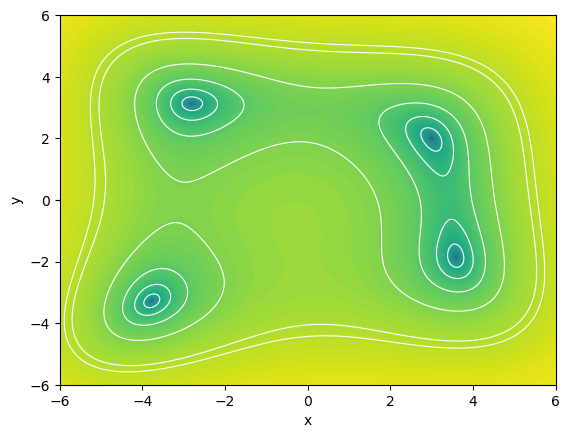

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm
%matplotlib inline
from scipy.optimize import fsolve
from scipy.integrate import odeint

def f(x,y):
    return (x*x + y - 11)**2 + (x + y*y - 7)**2

x = np.linspace(-6,6,1000)
y = np.linspace(-6,6,1000)
X,Y = np.meshgrid(x,y)
plt.contourf(X,Y,np.log10(f(X,Y)),100, cmap='viridis')
plt.contour(X,Y,np.log10(f(X,Y)), levels=[0.3,1,1.5,1.98, 2.5, 2.6], colors='white', linewidths=0.8)
plt.xlabel('x')
plt.ylabel('y')

Text(0.5, 0.5, 'y')

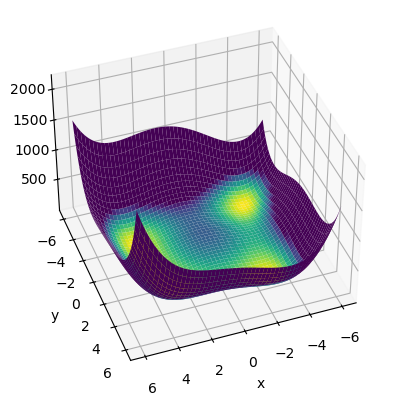

In [2]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, f(X,Y), cmap='viridis_r', clim=[0,255])
ax.view_init(elev=40, azim=70, roll=0)
ax.set_xlabel('x')
ax.set_ylabel('y')

### Critical points
The critical points are found from 
$$\frac{\partial f}{\partial x} = 0,$$
$$\frac{\partial f}{\partial y} = 0,$$

<font color="blue">
$$2x^3 + 2xy - 21x + y^2 - 7 = 0,$$
$$x^2 + 2xy + 2y^3 - 13y - 11 = 0.$$
</font>

These equations have nine solutions:
- (0.086677506,   2.884254703)
- (-2.805118089,  3.13131252)
- (-3.073025754,  -0.08135304)
- (-3.779310261,  -3.283186001)
- (-0.270844597,  -0.923038526)
- (-0.127961343,  -1.953714998)
- (3.584428343,   -1.848126546)
- (3.385154189,   0.073851888)
- (3.0,   2.0)



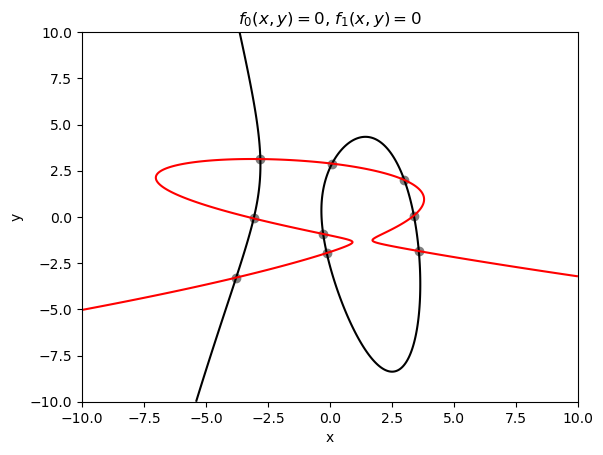

In [3]:
def f(xy):
    x = xy[0]
    y = xy[1]
    f0 = 2*x*x*x + 2*x*y - 21*x + y*y - 7
    f1 = x*x + 2*x*y + 2*y*y*y - 13*y - 11
    return np.array([f0,f1])
    
def f0(x,y):
    return 2*x*x*x + 2*x*y - 21*x + y*y - 7
def f1(x,y):
    return x*x + 2*x*y + 2*y*y*y - 13*y - 11

x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
X,Y = np.meshgrid(x,y)

plt.contour(X,Y,f0(X,Y), levels=[0], colors='black')
plt.contour(X,Y,f1(X,Y), levels=[0], colors='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$f_0(x,y)=0$, $f_1(x,y)=0$');

xsol = np.array([0.086677506, -2.805118089, -3.073025754, -3.779310261, -0.270844597, -0.127961343, 3.584428343, 3.385154189, 3.0])
ysol = np.array([2.884254703, 3.13131252, -0.08135304, -3.283186001, -0.923038526, -1.953714998, -1.848126546, 0.073851888, 2.0])

plt.scatter(xsol, ysol, color='gray')

In [9]:
#------------------- Define the system to solve: f(x)

def f(x):
    f0 = 2*x[0]*x[0]*x[0] + 2*x[0]*x[1] - 21*x[0] + x[1]*x[1] - 7
    f1 = x[0]*x[0] + 2*x[0]*x[1] + 2*x[1]*x[1]*x[1] - 13*x[1] - 11
    return np.array([f0,f1])

#--------------- Analytic Jacobian

def jac(f, x):
    J = np.array([[ 6*x[0]*x[0]+2*x[1]-21, 2*x[0]+2*x[1]], 
                  [ 2*x[0]+2*x[1],         2*x[0]+6*x[1]*x[1]-13]])
    return J
    
#------------------ Simple Newton Solver

def newton(f, x0, tol=1E-6):
    
    maxit = 50     # don't do more than this many iterations
    x     = x0     # initialize the solution x
    
    for nit in range(1, maxit+1) :
        J = jac(f, x)
        dx = np.linalg.solve(J,-f(x))
        xnew = x + dx
        err = np.linalg.norm((xnew-x)/xnew)
        x = xnew
        if err < tol :
            break
        if nit == maxit:
            print(f"warning, not converged in {maxit} iterations")
        
    return x

#------------------ Right hand side function of the ODE to solve

def rhsf(x,t, f,f0):
    
    J = jac(f,x)
    return -np.dot(np.linalg.inv(J), f0)
        
#------------------ Solve with Newton and fsolve

xy0 = np.array([2.0,2.0])            # initial guess

xy_nt = newton(f, xy0)       
xy_py = fsolve(f, xy0)

#------------------ Homotopy solve

f0 = f(xy0)
t  = np.array([0,1])
xy_hc = odeint(rhsf, xy0, t, args=(f, f0,))[-1,:]

print("Newton: ", xy_nt, "  Different root")
print("Python: ", xy_py)
print("HC:     ", xy_hc)


Newton:  [ 3.58442834 -1.84812653]   Different root
Python:  [3. 2.]
HC:      [2.99999981 2.00000008]


## Arc-length continuation
* The method above only allows for the solution of one root for a given initial condition since there will only be one occurrence of $t=1$ along the solution path.
* We would like to extend the path and allow $t$ to "turn around" so that multiple crossings of $t=1$ occur, and we can capture all roots from a single starting guess.
* This is done using an arc-length continuation.
* Parameterize $x$ and $t$ as functions of an arc-length $s$ along the solution path. Then $x=x(s)$, $t=t(s)$.
* Let $y^T(s)=[x^T(s),t(s)]$.

We have
$$h(y(s)) = h(x(s),t(s)) = t(s)f(x(s)) + (1-t(s))g(x(s)) = 0.$$
Now,
$$dh_i = \left[\frac{\partial h_i}{\partial y_j}\right]\left(\frac{dy_i}{ds}\right)ds = 0,$$
or
$$\left[\frac{\partial h_i}{\partial y_j}\right]\left(\frac{dy_i}{ds}\right) = 0.$$

Here,  $J \equiv \left[\frac{\partial h_i}{\partial y_j}\right]$
is the Jacobian matrix, and we have
$$J\left(\frac{dy}{ds}\right) = 0.$$

This constitutes an ODE system. We integrate system $dy/ds$ along path $s$, solving solve $J(dy/ds)=0$ for the "rates" $dy/ds$ as we go. 

Note that $dy/ds$ is a tangent vector to the solution path. $J(dy/ds)$ is matrix $J$ times vector $dy/ds$, and $J(dy/ds)=0$ implies that $dy/ds$ is in the null space of $J$.

For the Himmelblau system, we have $y^T = [x_0, x_1, t]$, and $J$ is a $2\times 3$ matrix with rank 2 and has a nullity of 1. That is, the null space is defined by the single vector $dy/ds$, which we want. (This is true of the method in general, not just for the two-equation Himmelblau system.) However, this doesn't set the direction or magnitude of the vector. That is arbitrary. We take the length to be unity, that is $||dy/ds||_2=1$. In effect, this sets the "units" (or scale) of of the arc-length $s$, which is arbitrary.

The null-space vector $dy/ds$ is computed by taking the *full* QR decomposition of $J^T$. Then $dy/ds$ is the last column of $Q$. In numpy, this is simply 
```
Q,R = np.linalg.qr(J.transpose(), mode="complete")
dyds = Q[:,-1]
```
(This can also be done as the last column of $v$ in the SVD of $J$, that is $J=U\Sigma V^T$, again, using the *full* SVD. See Theorem 5.2 of Trefethen's Numerical Linear Algebra book. But QR algorithms are faster.)

Note, we still have a degree of freedom. $dy/ds$ is tangent to the path, but it can go in either direction. From the initial guess for $x$, we travel the path in both the positive and negative directions. Positive and negative directions are defined as follows. The $2\times 3$ Jacobian matrix with rank 2 is "filled out" by adding another row $dy/ds$. The result has rank 3, and so its determinant is never zero. This means that it cannot cross zero along the path. So, in evaluating $dy/ds$, we change the sign of $dy/ds$ as needed so that the determinant always has the same sign (for a given path direction, "positive" or "negative". See Chen and Li, "Homotopy continuation method for solving systems of nonlinear and polynomial equations," Communications in Information and Systems 15(2) 119-307, 2015. The article "[Algorithm 652 Hompack](https://dl.acm.org/doi/10.1145/29380.214343): a suite of codes for globally convergent homotopy algorithms," by L.T. Watson, S.C. Billups, and A.P. Morgan, ACM Transactions of Mathematical Software, 13(3) 281-310, 1987, notes that an alternative is just to set the sign of $dyds$ so that it always forms an acute angle with its previous value. But this is awkward when using a black-box ODE solver since we don't have ready access to the previous value.

### Solve for the roots

In [25]:
def f(x):
    f0 = 2*x[0]*x[0]*x[0] + 2*x[0]*x[1] - 21*x[0] + x[1]*x[1] - 7
    f1 = x[0]*x[0] + 2*x[0]*x[1] + 2*x[1]*x[1]*x[1] - 13*x[1] - 11
    return np.array([f0,f1])

#-----------------

def jac(y):
    x = y[:2]
    t  = y[2]

    dH0dx0 = 6*x[0]*x[0] + 2*x[1] - 21
    dH0dx1 = 2*(x[0] + x[1])
    dH0dt  = finit[0]
    dH1dx0 = 2*(x[0] + x[1])
    dH1dx1 = 2*x[0] + 6*x[1]*x[1] - 13
    dH1dt  = finit[1]

    J = np.array([[dH0dx0, dH0dx1, dH0dt], [dH1dx0, dH1dx1, dH1dt]])
    return J

#-----------------

def rhsf(y, s):
    J = jac(y)
    Q,R = np.linalg.qr(J.transpose(), mode='complete')
    ys = Q[:,-1]   # [dx0/ds, dx1/ds, dt/ds]
    sign = np.linalg.det(np.row_stack((J,ys)))
    if pos     and sign < 0.0: ys *= -1
    if not pos and sign > 0.0: ys *= -1
    return ys
    
#-----------------

xinit = np.array([0.0, 0.0])
finit = f(xinit)
tinit = 0.0
yinit = np.array([xinit[0], xinit[1], tinit])

#-----------------
# positive path

pos  = True
send = 25.0
ns   = 1000
spos = np.linspace(0,send,ns)
ypos = odeint(rhsf, yinit, spos)
xpos = ypos[:,:-1]
tpos = ypos[:,-1]

#-----------------
# negative path

pos  = False
send = 25.0
ns   = 1000
sneg = np.linspace(0,send,ns)
yneg = odeint(rhsf, yinit, sneg)
xneg = yneg[:,:-1]
tneg = yneg[:,-1]

#-----------------
# combine the two paths

s  = np.hstack((-sneg, spos))
t  = np.hstack((tneg, tpos))
x0 = np.hstack((xneg[:,0], xpos[:,0]))
x1 = np.hstack((xneg[:,1], xpos[:,1]))

#-----------------
# recover the roots:
# find s values where t crosses 1.0
# then fit a cubic polynomial to surrounding points and evaluate at t=1.0
# points: *     * s    *      * 
#        i-2   i-1     i     i+1
#    where "s" is the s location where t=1.0, and the *'s are path points.

r_x0x1s = []
for i in range(1,len(t)):
    if (t[i] >=1 and t[i-1] < 1) or (t[i] <=1 and t[i-1] > 1):
        ps  = np.polyfit(t[i-2:i+2],  s[i-2:i+2], 3)
        px0 = np.polyfit(s[i-2:i+2], x0[i-2:i+2], 3)
        px1 = np.polyfit(s[i-2:i+2], x1[i-2:i+2], 3)
        sval = np.polyval(ps, 1.0)
        r_x0x1s.append(np.array([np.polyval(px0, sval), np.polyval(px1, sval), sval]))

print("Roots: x0, x1")
for i in range(len(r_x0x1s)):
    print(r_x0x1s[i][:-1])
    #print(f(r_x0x1s[i][:-1]))       # verify that f(x) = 0.0
    

Roots: x0, x1
[0.08667747 2.88425469]
[-2.80511793  3.13131248]
[-3.0730256  -0.08135294]
[-3.77931017 -3.283186  ]
[-0.27084455 -0.92303869]
[-0.12796135 -1.95371493]
[ 3.58442825 -1.8481264 ]
[3.38515412 0.07385171]
[2.99999984 2.00000021]


### Plot t(s) to see the t=1 crossings

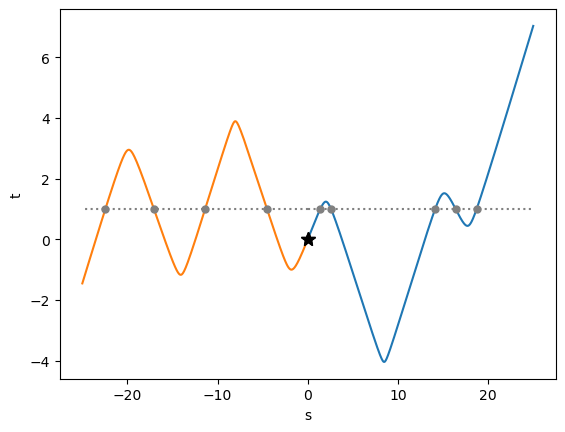

In [6]:
plt.plot(spos, tpos)
plt.plot(np.array([spos[0],spos[-1]]), np.array([1.0, 1.0]), ':', color='gray')
plt.plot(-sneg, tneg)
plt.plot(np.array([-sneg[0],-sneg[-1]]), np.array([1.0, 1.0]), ':', color='gray')
plt.plot([0,0], [0,0], '*', color='black', ms=10)
for i in range(len(r_x0x1s)):
    plt.plot(r_x0x1s[i][-1], 1.0, 'o', color='gray', ms=5)
plt.xlabel('s')
plt.ylabel('t');

### Plot the path in $x_0$, $x_1$, $t$ space
* Also show the $t=1$ plane. The roots occur at the $x_0$ and $x_1$ locations where the path crosses the $t=1$ plane. 

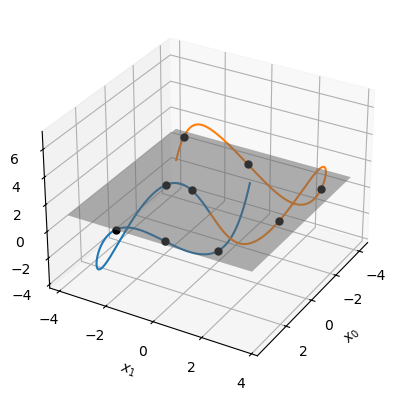

In [19]:
def plot_path(elev):
    ax = plt.axes(projection='3d')
    ax.plot3D(xpos[:,0], xpos[:,1], tpos)
    ax.plot3D(xneg[:,0], xneg[:,1], tneg)
    for i in range(len(r_x0x1s)):
        ax.plot3D(r_x0x1s[i][0], r_x0x1s[i][1], 1.0, 'o', color='black', ms=5)
    
    xx0 = np.array([np.min(np.column_stack((xpos[:,0], xneg[:,0]))), 
                    np.max(np.column_stack((xpos[:,0], xneg[:,0])))])
    xx1 = np.array([np.min(np.column_stack((xpos[:,1], xneg[:,1]))), 
                    np.max(np.column_stack((xpos[:,1], xneg[:,1])))])
    
    XX0, XX1 = np.meshgrid(xx0, xx1)
    tt = np.array([[1,1],[1,1]])
    
    ax.plot_surface(XX0, XX1, tt, alpha=0.5, color='gray')
    ax.view_init(elev=elev, azim=30.0)
    ax.set_xlabel(r'$x_0$')
    ax.set_ylabel(r'$x_1$')
    ax.set_zlabel(r'$t$');

plot_path(30)

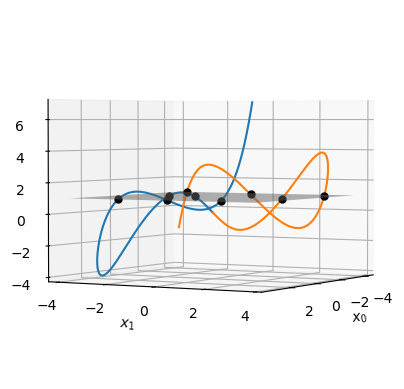

In [24]:
plot_path(2)